# The Spark Foundation #GRIPJULY2021

# Task-1 Prediction using Supervised ML

# By:Adhithyan.B

In [1]:
#Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Returns no of rows and columns of the dataset
data.shape

(25, 2)

In [4]:
#Returns the first 5 values
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Returns the last 5 values
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#Describes the given dataset 
data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Gives the information about the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


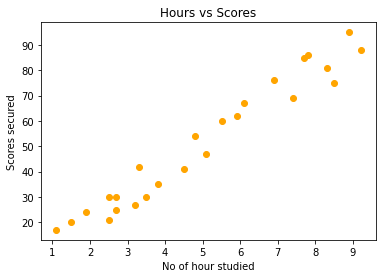

In [22]:
#Plotting the distribution of hours vs scores
plt.scatter(x='Hours',y='Scores',color='orange',data=data)
plt.title('Hours vs Scores')
plt.xlabel('No of hour studied')
plt.ylabel('Scores secured')
plt.show()

C:\Users\adhit\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

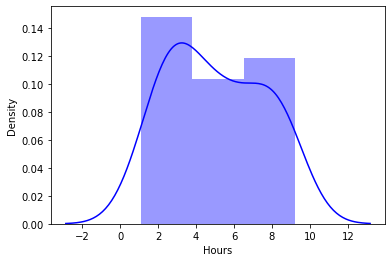

In [23]:
#Plotting of hours data using distplot
sns.distplot(data['Hours'],color='blue')

C:\Users\adhit\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

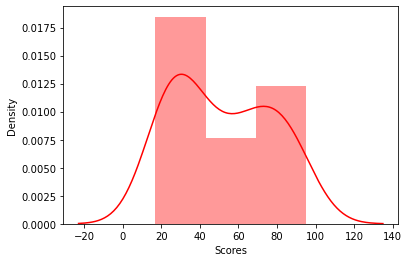

In [26]:
#Plotting of Scores data using distplot 
sns.distplot(data['Scores'],color='red')

In [11]:
#Dividing the data into independent variables(x,y)
x=data.iloc[:,0:1].values
y=data.iloc[:,1].values

In [12]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
 test_size=0.2, random_state=0)

In [13]:
#Training and testing the sets
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(X_train, y_train)
print('Training Completed..')

Training Completed..


In [14]:
#Using regression coefficients to estimate the coefficients
Coefficient=Reg.coef_
Coefficient

array([9.91065648])

In [15]:
#Using intercept to find mean value of scores when study hours = 0
Intercept=Reg.intercept_
Intercept

2.0181600414346974

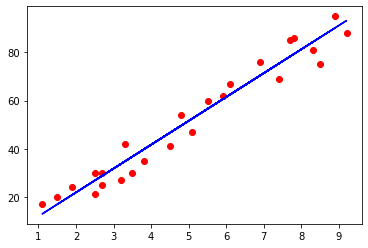

In [16]:
# This is the linear regression line equation
Line=Coefficient*x+Intercept

#Plotting the regression line
plt.scatter(x,y, color='red')
plt.plot(x, Line, color='blue');
plt.show()

In [17]:
# Testing Data in hours
print(X_test)
y_pred=Reg.predict(X_test)
print(y_pred)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
# Comparing the values of Actual(y_test) vs Predicted(y_pred)
comparison_dataset=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_dataset

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Prediciting the score when study hours=9.25
hours=9.25
OwnData_pred=Reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(OwnData_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


In [20]:
#Finding the Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
